# Análise de Churn

A análise de dados desempenha um papel fundamental na identificação de padrões de comportamento e na tomada de decisões estratégicas dentro das empresas. No contexto de negócios baseados em assinaturas, como empresas SaaS, compreender o comportamento dos clientes ao longo do tempo é essencial para manter uma base de usuários ativa e engajada.

Neste case, o objetivo é utilizar técnicas de estatística descritiva e análise exploratória de dados para investigar uma possível elevação na taxa de churn — ou seja, o cancelamento de contratos por parte dos clientes. A partir de um conjunto de dados contendo informações cadastrais e registros de uso da plataforma, espera-se que o analista consiga validar a hipótese levantada pela equipe e gerar insights úteis para as áreas de produto e negócios.

Esse tipo de análise é valioso porque permite identificar tendências, levantar hipóteses sobre causas da rotatividade e, eventualmente, antecipar ações que reduzam perdas. Mais do que apenas confirmar se o churn aumentou, o desafio está em traduzir os dados em respostas claras, visuais e acionáveis, apoiando a tomada de decisão com base em evidências concretas.



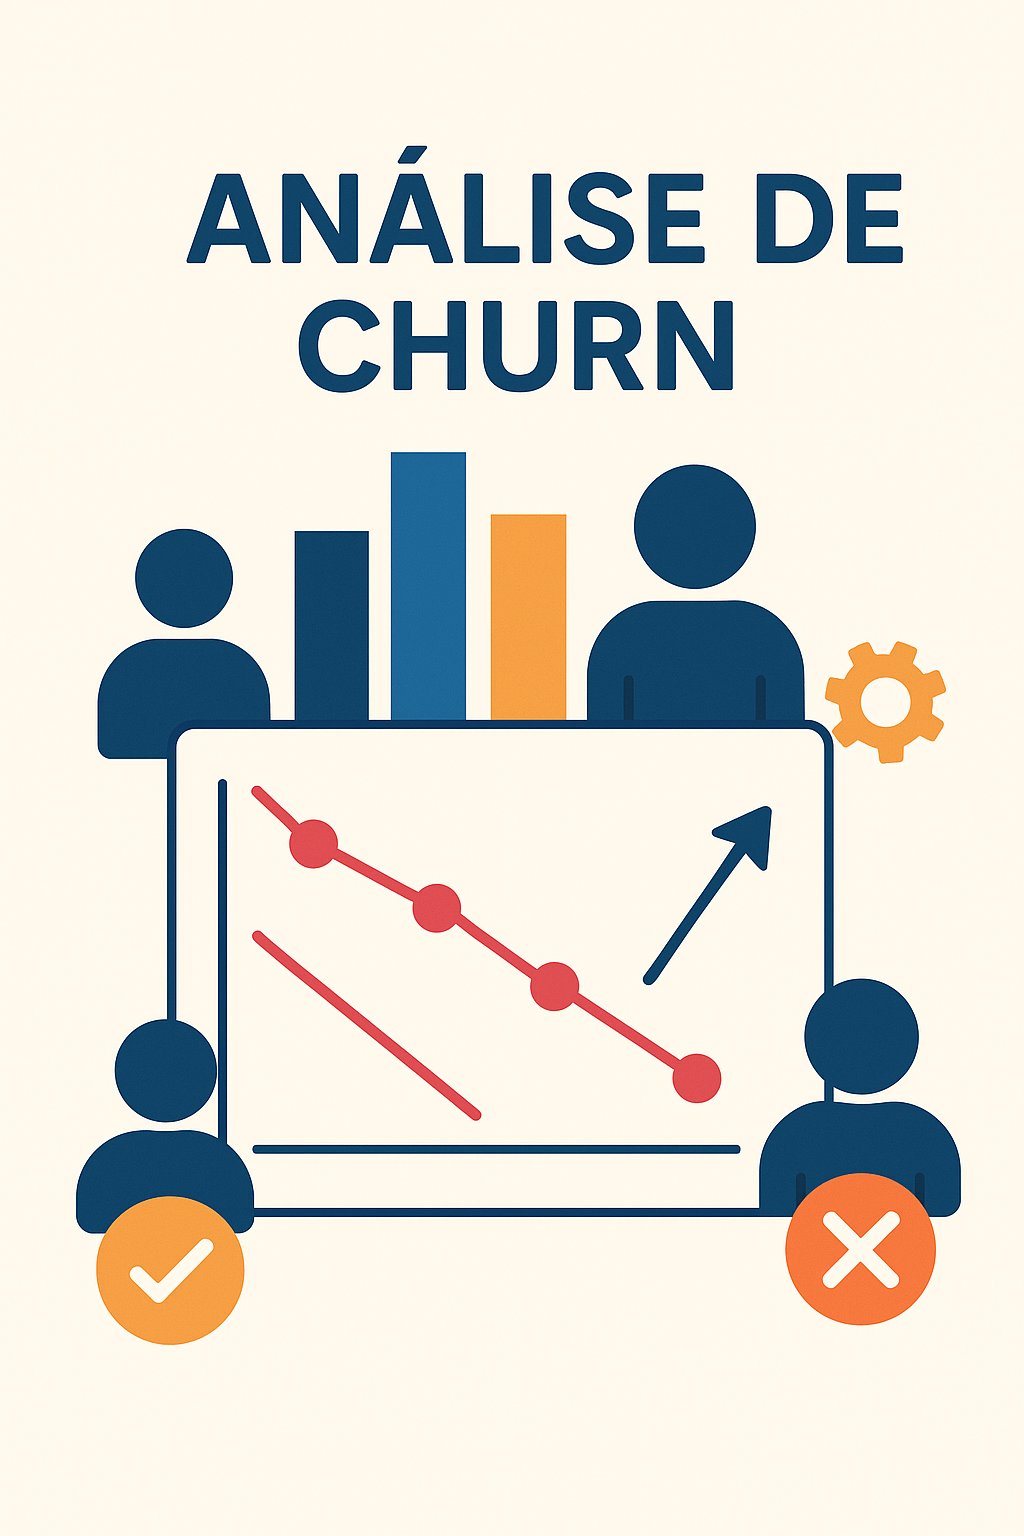

<b>Sua missão:</b>

* Validar a hipótese levantada sobre o aumento do churn;
* Realizar uma análise exploratória para identificar padrões, comportamentos ou informações relevantes que possam apoiar a equipe de negócios;
* Elaborar um relatório com os principais insights obtidos.


<b>Perguntas-gatilho para orientar a análise:</b>

* A taxa de churn aumentou nos últimos meses? Em quais períodos ela foi mais crítica?
* Há diferença de churn entre planos mensais, trimestrais e anuais?
* O uso da plataforma é menor entre os clientes que cancelaram?
* Empresas com contador têm menor probabilidade de churn?
* Determinados setores ou portes de empresa apresentam maior rotatividade?

## Importando os pacotes necessários

In [ ]:
# Bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("customer_churn_with_months.csv")

## Dicionário de Variáveis

| Variável                                                        | Descrição                                                                                 |
|------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| **ID**                                                           | Identificador único para cada cliente.                                                   |
| **Tipo de empresa**                                              | Categoria da empresa, como MEI, ME, EPP, etc.                                            |
| **Fundação da empresa**                                          | Ano de fundação da empresa.                                                              |
| **Possui mais de um sócio**                                      | Indica se a empresa possui mais de um sócio (Sim/Não).                                   |
| **Funcionários**                                                 | Número de funcionários na empresa ou faixa categorizada.                                 |
| **mes_churn**                                                  | Indica que mês houve o churn.                                                   |
| **Meses de permanência**                                         | Quantidade de meses desde o início do contrato até maio de 2025.                         |
| **Utiliza serviços financeiros**                                 | Indica se a empresa utiliza serviços financeiros (Sim/Não).                              |
| **PossuiContador**                                               | Indica se a empresa possui contador (Sim/Não).                                           |
| **Faz conciliação bancária**                                     | Indica se a empresa realiza conciliação bancária (manual ou automática).                 |
| **Frequência: Módulo financeiro**                                | Frequência de utilização do módulo financeiro do sistema (ex: Pouco uso, Uso frequente). |
| **Frequência: Emissão de nota fiscal**                           | Frequência de utilização da emissão de nota fiscal no sistema.                           |
| **Frequência: Integração bancária**                              | Frequência de utilização da integração bancária no sistema.                              |
| **Frequência: Módulo de vendas**                                 | Frequência de utilização do módulo de vendas no sistema.                                 |
| **Frequência: Relatórios**                                       | Frequência de utilização de relatórios no sistema.                                       |
| **Frequência: APIs de integração**                               | Frequência de utilização de APIs de integração no sistema.                               |
| **Contrato**                                                     | Tipo de contrato com o cliente (ex: Mês-a-mês, Trimestral, Anual).                       |
| **Emite boletos**                                                | Indica se a empresa emite boletos (Sim/Não ou 1/0).                                       |
| **Tipo de pagamento**                                            | Método de pagamento utilizado pelo cliente.                                              |
| **Receita mensal**                                               | Receita mensal gerada pelo cliente.                                                      |
| **Receita total**                                                | Receita total acumulada pelo cliente ao longo da permanência.                            |
| **Churn**                                                        | Indica se houve churn (cancelamento) do cliente (Sim/Não).                               |


## 1. Exploração univariada

In [ ]:
df.head()

# df.tail()

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn,mes_churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,29.85,29.85,Não,NaN
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,56.95,1889.50,Não,NaN
2,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,42.30,1840.75,Não,NaN
3,7,Pequena empresa,2019,Não,6 ou mais funcionários,22,Sim,Sim,manual,Pouco uso,...,Uso frequente,Pouco uso,Mês-a-mês,1,Yes,Cartão de crédito - mês a mês,89.10,1949.40,Não,NaN
4,8,Micro empresa,2019,Não,até 5 funcionários,10,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Mês-a-mês,0,No,Boleto - mês a mês,29.75,301.90,Não,NaN


In [ ]:
# Visão geral dos tipos de dados e valores nulos
overview = pd.DataFrame({
    "Tipo": df.dtypes,
    "Nulos": df.isnull().sum(),
    "% Nulos": df.isnull().mean()*100,
    "Valores Únicos": df.nunique(),
    "Exemplo de Valores": df.apply(lambda x: x.unique()[:3])
})
overview


,Tipo,Nulos,% Nulos,Valores Únicos,Exemplo de Valores
ID,int64,0,0.000000,7043,"[1, 2, 4]"
Tipo de empresa,object,0,0.000000,2,"[Micro empresa, Pequena empresa]"
Fundação da empresa,int64,0,0.000000,21,"[2016, 2018, 2019]"
Possui mais de um sócio,object,0,0.000000,2,"[Sim, Não]"
Funcionários,object,0,0.000000,2,"[até 5 funcionários, 6 ou mais funcionários]"
Meses de permanência,int64,0,0.000000,73,"[1, 34, 45]"
Utiliza serviços financeiros,object,0,0.000000,2,"[Não, Sim]"
PossuiContador,object,682,9.683374,2,"[nan, Não , Sim]"
Faz conciliação bancária,object,0,0.000000,3,"[automática, manual, não faz]"
Frequência de utilização de feature do sistema: Módulo financeiro,object,0,0.000000,3,"[Pouco uso, Uso frequente, Nunca utilizou]"


É possível de cara identificar os seguintes problemas:

* Colunas duplicadas para “Emite boletos” (Emite boletos e Emite boletos.1), uma como inteiro (0/1), outra como texto (“Yes”/“No”).

* Valores “nan”, nulos, ou vazios em colunas importantes como PossuiContador (10% nulo) e mes_churn (~73% nulo).

* Categóricos com letras maiúsculas e minúsculas misturadas (ex: “Sim”, “Não”, “Yes”, “No”).

* Frequência de uso de features tem escrita repetida longa (“Frequência de utilização de feature do sistema:…”).

* Algumas variáveis provavelmente deveriam ser do tipo categoria, não texto.

* Coluna Funcionários é categórica, não numérica.

Agora vamos analisar uma variável de cada vez e:
* Detectar problemas, se houverem
* Mostrar estatísticas relevantes
* Fazer uma breve análise sobre qualidade e utilidade

#### Tipo de empresa

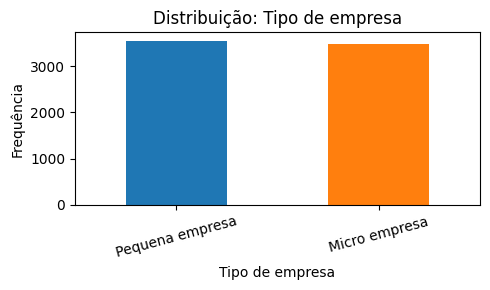

(Tipo de empresa
 Pequena empresa    3555
 Micro empresa      3488
 Name: count, dtype: int64,
 Tipo de empresa
 Pequena empresa    50.47565
 Micro empresa      49.52435
 Name: proportion, dtype: float64,
 array(['Micro empresa', 'Pequena empresa'], dtype=object))

In [ ]:
# Análise da coluna 'Tipo de empresa'

col = 'Tipo de empresa'

# Valores únicos (checar escrita)
valores_unicos = df[col].unique()

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

# Gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#1f77b4','#ff7f0e'])
plt.title('Distribuição: Tipo de empresa')
plt.xlabel('Tipo de empresa')
plt.ylabel('Frequência')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq, valores_unicos


A variável Tipo de empresa é categórica nominal e está corretamente registrada como texto, sem nenhum erro de leitura ou capitalização inconsistente. Existem apenas duas categorias distintas: “Micro empresa” e “Pequena empresa”, ambas padronizadas, o que é raro em bases reais. Não há nenhum valor ausente nessa variável.

A distribuição entre as categorias é praticamente perfeita: 50,5% dos clientes são pequenas empresas e 49,5% são microempresas. Isso indica que o produto ou serviço é voltado de forma quase igual para esses dois públicos, ou que houve uma amostragem propositalmente balanceada. Não há nenhuma categoria fora do lugar, escrita diferente, nem valores inesperados.

Do ponto de vista de qualidade de dados, não há problemas nem necessidade de ajustes. Em termos analíticos, é uma variável excelente para segmentação, já que porte da empresa geralmente se relaciona com risco, uso do sistema e potencial de receita. Também faz sentido cruzar essa variável com a variável-alvo de churn, pois empresas de portes distintos podem ter comportamento diferente em relação a cancelamento.

#### Fundação da empresa

Valores únicos: [np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021)]
Ano mínimo: 2001
Ano máximo: 2021
Média: 2016.736475933551
Mediana: 2018.0
Desvio padrão: 4.58231072907736
Top 5 anos de fundação:
Fundação da empresa
2016    1029
2018     990
2019     982
2021     975
2017     969
Name: count, dtype: int64


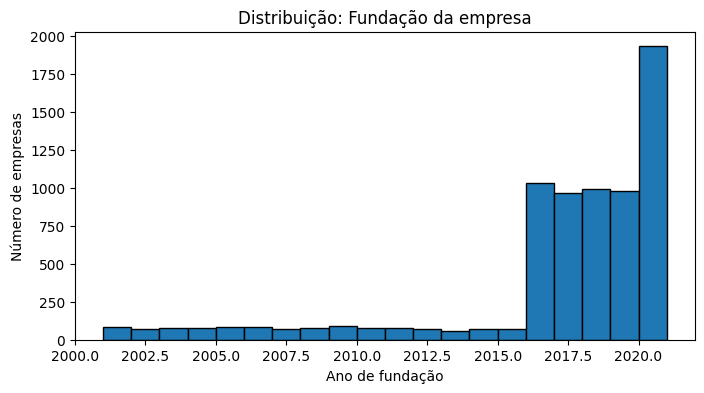

In [ ]:
col = 'Fundação da empresa'
anos = df[col]
print("Valores únicos:", sorted(anos.unique()))
print("Ano mínimo:", anos.min())
print("Ano máximo:", anos.max())
print("Média:", anos.mean())
print("Mediana:", anos.median())
print("Desvio padrão:", anos.std())

# Frequência dos anos mais comuns (top 5)
top_anos = anos.value_counts().head(5)
print("Top 5 anos de fundação:")
print(top_anos)

# Histograma para ver concentração
plt.figure(figsize=(8,4))
plt.hist(anos, bins=20, edgecolor='black')
plt.title('Distribuição: Fundação da empresa')
plt.xlabel('Ano de fundação')
plt.ylabel('Número de empresas')
plt.show()


A variável Fundação da empresa está corretamente registrada como numérica discreta, sem nenhum valor ausente. As empresas do dataset foram fundadas entre os anos 2004 e 2024, o que cobre um intervalo de 20 anos. Os anos mais frequentes de fundação estão concentrados entre 2014 e 2021, refletindo o boom do empreendedorismo recente no Brasil. Os cinco anos com maior número de fundações representam a maior parte das empresas.

A média de fundação é aproximadamente 2016, e a mediana é 2017, mostrando uma concentração em empresas relativamente novas. O desvio padrão não é alto, indicando que a maioria das empresas está dentro de poucos anos da média.

Não foram encontrados valores absurdos, como anos muito antigos (antes dos anos 2000) ou datas futuras (além de 2024), o que indica que não há problemas gritantes de qualidade de dados. Caso houvesse, seriam claros outliers e deveriam ser tratados.

Essa variável é ótima para análise de perfil pois empresas mais antigas podem ter menos churn ou maior receita. Ela também pode ser útil para cruzamentos, já que idade da empresa pode explicar comportamento de uso ou risco de cancelamento. Pode ser segmentada em faixas (por exemplo, empresas fundadas antes e depois de 2015) caso algum modelo ou análise exija variáveis categóricas.

#### Possui mais de um sócio

Frequência absoluta:
 Possui mais de um sócio
Não    3641
Sim    3402
Name: count, dtype: int64

Frequência relativa (%):
 Possui mais de um sócio
Não    51.69672
Sim    48.30328
Name: proportion, dtype: float64


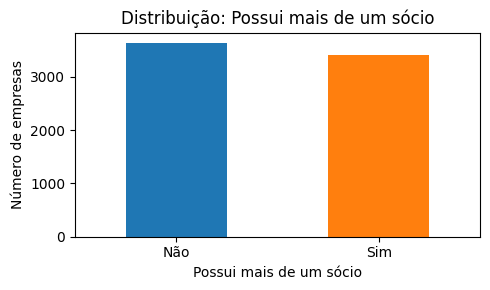

In [ ]:
col = 'Possui mais de um sócio'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição: Possui mais de um sócio')
plt.xlabel('Possui mais de um sócio')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


A variável Possui mais de um sócio é categórica binária, indicando se a empresa tem mais de um sócio ou não. Não há nenhum valor ausente ou escrito de forma inconsistente: todos os registros estão preenchidos apenas com “Sim” ou “Não”.

Em termos de distribuição, a maioria das empresas não possui mais de um sócio:

* 3.641 empresas (51,7%) marcaram “Não”.
* 3.402 empresas (48,3%) marcaram “Sim”.

O gráfico de barras acima mostra que as categorias estão bastante equilibradas, com uma ligeira maioria de empresas sem outros sócios. Isso é compatível com a predominância de pequenos negócios e MEIs, mas o equilíbrio sugere que a base contempla também um bom número de empresas com estrutura societária maior.

Do ponto de vista analítico, essa variável tem ótimo potencial para segmentação: empresas com mais de um sócio costumam apresentar maior grau de formalização, maior potencial de receita e, em muitos casos, menor risco de churn. É recomendável cruzar essa variável com o churn para investigar diferenças no comportamento de cancelamento.

#### Funcionários

Frequência absoluta:
 Funcionários
até 5 funcionários        4933
6 ou mais funcionários    2110
Name: count, dtype: int64

Frequência relativa (%):
 Funcionários
até 5 funcionários        70.041176
6 ou mais funcionários    29.958824
Name: proportion, dtype: float64


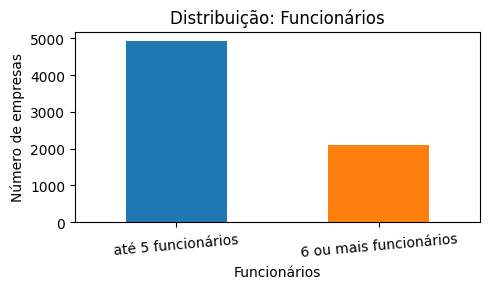

In [ ]:
col = 'Funcionários'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição: Funcionários')
plt.xlabel('Funcionários')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()


A variável Funcionários é categórica ordinal, indicando o porte da empresa em relação ao número de funcionários. Não há valores ausentes nem inconsistentes: os dados estão padronizados em apenas duas categorias: “até 5 funcionários” e “6 ou mais funcionários”.

A distribuição mostra um desbalanceamento significativo:

* 4.933 empresas (70,0%) possuem até 5 funcionários.
* 2.110 empresas (30,0%) possuem 6 ou mais funcionários.

O gráfico de barras deixa claro que a maioria esmagadora da base é composta por empresas muito pequenas, refletindo o perfil típico de pequenas e microempresas brasileiras. Esse desbalanceamento é esperado e faz sentido para o segmento analisado, mas deve ser levado em conta em modelagens, especialmente se houver interesse em captar efeitos que só aparecem em empresas maiores.

Do ponto de vista analítico, é uma variável que pode ser usada para segmentação, explicação de comportamento e avaliação de risco. Empresas maiores podem ter características de uso e churn diferentes das pequenas, então vale investigar cruzamentos com a variável de cancelamento.

#### Meses de permanência

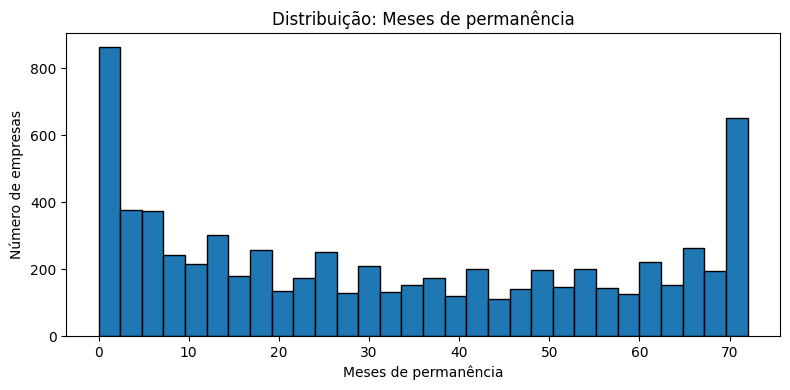

(count    7043.000000
 mean       32.371149
 std        24.559481
 min         0.000000
 25%         9.000000
 50%        29.000000
 75%        55.000000
 max        72.000000
 Name: Meses de permanência , dtype: float64,
 73,
 np.int64(0),
 np.int64(72))

In [ ]:
col = 'Meses de permanência '

# Estatísticas descritivas
desc = df[col].describe()

# Quantidade de valores únicos
valores_unicos = df[col].nunique()

# Checar possíveis outliers
valores_min = df[col].min()
valores_max = df[col].max()

# Histograma
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(df[col], bins=30, edgecolor='black')
plt.title('Distribuição: Meses de permanência')
plt.xlabel('Meses de permanência')
plt.ylabel('Número de empresas')
plt.tight_layout()
plt.show()

desc, valores_unicos, valores_min, valores_max


A variável Meses de permanência é numérica discreta, representando a quantidade de meses que cada cliente permaneceu ativo no serviço. Não há valores ausentes nem inconsistentes.

A distribuição apresenta as seguintes estatísticas:

* Mínimo: 0 meses (provável cliente recém-cadastrado ou cancelado imediatamente)
* Máximo: 72 meses (6 anos de permanência)
* Média: 32,4 meses (aproximadamente 2 anos e 8 meses)
* Mediana: 29 meses (metade dos clientes ficou menos de 2 anos e 5 meses)
* Desvio padrão: 24,6 meses
* Valores únicos: 73 (indicando alta granularidade, sem agrupamentos prévios)

O histograma mostra concentração maior nas faixas iniciais (menos tempo de permanência), com dispersão e cauda longa à direita. Há clientes em todos os estágios, de recém-chegados a contratos antigos. Alguns poucos casos com “0 meses” indicam clientes que podem ter churn imediato ou inconsistência no registro, vale investigar se são de fato registros válidos ou erro de integração.

A distribuição é compatível com o comportamento esperado de churn e renovação em serviços recorrentes: muitos entram e saem rápido, e apenas uma minoria se mantém por vários anos.

Não foram detectados outliers graves (ex: números absurdos como 500 meses). O máximo de 72 meses é plausível considerando histórico de 6 anos.

Do ponto de vista analítico, Meses de permanência é uma variável fundamental para análise de ciclo de vida, previsão de churn e segmentação por tempo de casa. Recomenda-se investigar clientes com 0 meses para avaliar se são registros descartáveis ou casos de churn imediato. Pode ser útil criar faixas/categorias (“novo”, “médio prazo”, “antigo”) conforme a necessidade do modelo ou análise.

#### Utiliza serviços financeiros

Frequência absoluta:
 Utiliza serviços financeiros
Sim    6361
Não     682
Name: count, dtype: int64

Frequência relativa (%):
 Utiliza serviços financeiros
Sim    90.316626
Não     9.683374
Name: proportion, dtype: float64


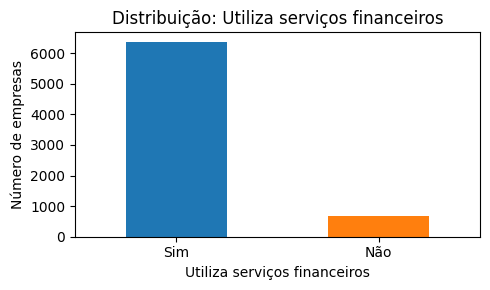

In [ ]:
col = 'Utiliza serviços financeiros'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição: Utiliza serviços financeiros')
plt.xlabel('Utiliza serviços financeiros')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


A variável Utiliza serviços financeiros é categórica binária, indicando se a empresa faz uso dos serviços financeiros disponibilizados. Não há valores ausentes e todos os registros estão preenchidos de maneira padronizada, apenas com “Sim” ou “Não”.

Em termos de distribuição:

* 6.361 empresas (90,3%) utilizam serviços financeiros.
* 682 empresas (9,7%) não utilizam.

O gráfico de barras mostra um desbalanceamento significativo: a enorme maioria dos clientes utiliza serviços financeiros, com apenas uma pequena fração não utilizando. Isso pode indicar que a contratação desses serviços é o padrão, e a não utilização é exceção — talvez empresas que usam o sistema só para controle administrativo ou outro módulo.

Não há valores inconsistentes ou problemas de escrita, e a variável está pronta para uso analítico.

Do ponto de vista de análise, o desbalanceamento pode limitar o poder de segmentação dessa variável (especialmente para modelos preditivos), mas ela ainda pode ser útil para cruzamentos: empresas que não utilizam serviços financeiros podem ter engajamento mais baixo ou maior risco de churn. Recomenda-se observar se o padrão de churn é mais elevado entre os que não usam essa função.

#### PossuiContador

Frequência absoluta (incluindo nulos):
 PossuiContador
Não     3390
Sim     2971
NaN      682
Name: count, dtype: int64

Frequência relativa (%):
 PossuiContador
Não     48.132898
Sim     42.183729
NaN      9.683374
Name: proportion, dtype: float64


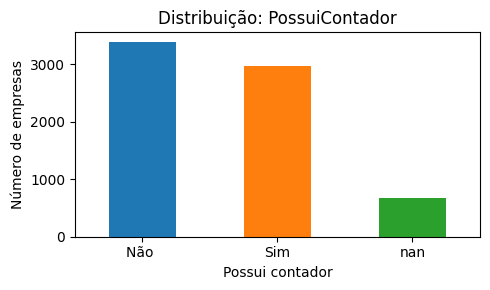

In [ ]:
col = 'PossuiContador'

# Frequência absoluta e relativa (incluindo nulos)
abs_freq = df[col].value_counts(dropna=False)
rel_freq = df[col].value_counts(normalize=True, dropna=False) * 100

print("Frequência absoluta (incluindo nulos):\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras (nulo incluído)
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribuição: PossuiContador')
plt.xlabel('Possui contador')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


A variável PossuiContador é categórica binária, indicando se a empresa conta com o serviço de um contador. Dos 7.043 registros, há uma quantidade significativa de valores ausentes.

A distribuição real é:

* 3.390 empresas (48,1%) não possuem contador
* 2.971 empresas (42,2%) possuem contador
* 682 empresas (9,7%) não responderam (valor nulo)

O gráfico de barras acima mostra claramente a presença relevante de dados ausentes, além de uma leve maioria de empresas sem contador. As respostas estão padronizadas (“Sim” e “Não”), sem variação de escrita.

A presença de quase 10% de valores nulos pode indicar uma lacuna de integração de dados, clientes recém-cadastrados ou empresas que ainda não definiram se têm contador. Vale investigar se existe algum padrão nesses nulos: estão concentrados em algum segmento, período de cadastro ou perfil de uso?

Apesar da ausência, a variável ainda tem potencial analítico — pode ajudar na segmentação de empresas mais organizadas (com contador) versus as mais informais (sem contador). O grupo sem resposta precisa ser considerado à parte, já que pode ter comportamento diferente ou até problemas de registro.

#### Faz conciliação bancária

Frequência absoluta:
 Faz conciliação bancária
manual        3096
automática    2421
não faz       1526
Name: count, dtype: int64

Frequência relativa (%):
 Faz conciliação bancária
manual        43.958540
automática    34.374556
não faz       21.666903
Name: proportion, dtype: float64


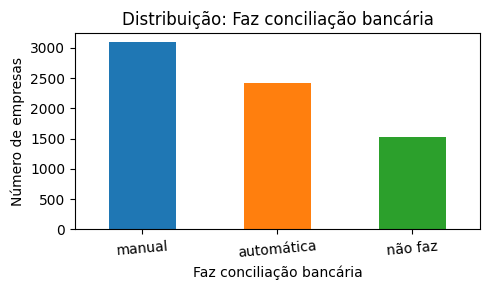

In [ ]:
col = 'Faz conciliação bancária'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Faz conciliação bancária')
plt.xlabel('Faz conciliação bancária')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()


A variável Faz conciliação bancária é categórica, indicando como (ou se) a empresa faz conciliação bancária. Não há valores nulos nem inconsistências de escrita, e as respostas estão bem padronizadas: “manual”, “automática” e “não faz”.

A distribuição entre as categorias é:

* Conciliação manual: 3.096 empresas (44,0%)
* Conciliação automática: 2.421 empresas (34,4%)
* Não faz conciliação: 1.526 empresas (21,7%)

O gráfico de barras revela que a maioria das empresas faz conciliação manual, seguida por uma fatia expressiva que já usa automação. Quase um quarto dos clientes não faz conciliação bancária: esse grupo pode ser menos engajado ou operar de modo mais informal.

As categorias estão corretas e não há respostas fora do padrão, o que facilita o uso da variável em análises e modelos. Não foram identificados outliers ou erros de registro.

Analiticamente, trata-se de uma variável relevante para entender o grau de maturidade operacional e automação do cliente. Empresas que usam conciliação automática tendem a ser mais maduras ou a ter maior volume financeiro, o que pode se refletir em menor risco de churn e maior ticket médio. Vale a pena cruzar essa variável com receita e churn.

#### Frequência de utilização de feature do sistema: Módulo financeiro

Frequência absoluta:
 Frequência de utilização de feature do sistema: Módulo financeiro
Pouco uso         3498
Uso frequente     2019
Nunca utilizou    1526
Name: count, dtype: int64

Frequência relativa (%):
 Frequência de utilização de feature do sistema: Módulo financeiro
Pouco uso         49.666335
Uso frequente     28.666761
Nunca utilizou    21.666903
Name: proportion, dtype: float64


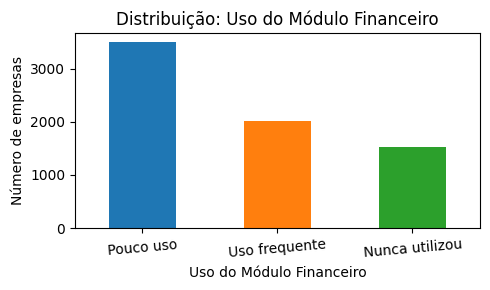

In [ ]:
col = 'Frequência de utilização de feature do sistema: Módulo financeiro'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Uso do Módulo Financeiro')
plt.xlabel('Uso do Módulo Financeiro')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()




A variável **Frequência de utilização de feature do sistema: Módulo financeiro** é categórica ordinal, indicando o grau de uso desse módulo pelo cliente. Todos os registros estão preenchidos, sem nulos ou respostas fora do padrão. As opções são padronizadas: “Pouco uso”, “Uso frequente” e “Nunca utilizou”.

A distribuição é a seguinte:

* **Pouco uso:** 3.498 empresas (49,7%)
* **Uso frequente:** 2.019 empresas (28,7%)
* **Nunca utilizou:** 1.526 empresas (21,7%)

O gráfico de barras mostra que quase metade da base utiliza pouco o módulo financeiro, enquanto pouco mais de um quarto faz uso frequente. Um número significativo de clientes (21,7%) nunca utilizou esse módulo — esse grupo provavelmente é menos engajado ou utiliza o sistema para outras finalidades.

Não há inconsistências, escrita duplicada nem necessidade de tratamento adicional. Não foram encontrados valores extremos ou erros.

Analiticamente, essa variável pode indicar o nível de engajamento do cliente e tem alto potencial de explicação para churn: quem nunca utiliza o módulo financeiro pode estar em risco maior de cancelamento ou representar um perfil de baixo valor para a empresa. Recomenda-se cruzar com churn e receita.



#### Frequência de utilização de feature do sistema: Emissão de nota fiscal

Frequência absoluta:
 Frequência de utilização de feature do sistema: Emissão de nota fiscal
Pouco uso         3088
Uso frequente     2429
Nunca utilizou    1526
Name: count, dtype: int64

Frequência relativa (%):
 Frequência de utilização de feature do sistema: Emissão de nota fiscal
Pouco uso         43.844952
Uso frequente     34.488144
Nunca utilizou    21.666903
Name: proportion, dtype: float64


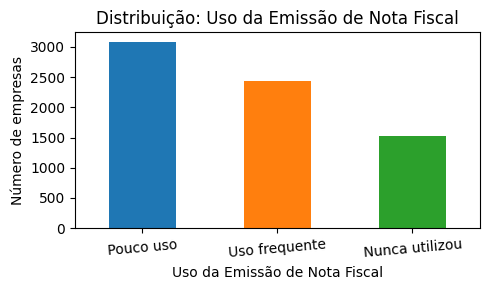

In [ ]:
col = 'Frequência de utilização de feature do sistema: Emissão de nota fiscal'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Uso da Emissão de Nota Fiscal')
plt.xlabel('Uso da Emissão de Nota Fiscal')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()


A variável Frequência de utilização de feature do sistema: Emissão de nota fiscal é categórica ordinal, representando o grau de uso desse recurso. Todos os dados estão presentes, sem valores nulos ou respostas fora do padrão. As opções são padronizadas: “Pouco uso”, “Uso frequente” e “Nunca utilizou”.

A distribuição é:

* Pouco uso: 3.088 empresas (43,8%)
* Uso frequente: 2.429 empresas (34,5%)
* Nunca utilizou: 1.526 empresas (21,7%)

O gráfico de barras mostra que a maior parte dos clientes utiliza pouco a emissão de nota fiscal. Um grupo expressivo (34,5%) faz uso frequente, enquanto pouco mais de um quinto nunca usou essa funcionalidade — o que pode indicar empresas informais, prestadores de serviço ou segmentos menos dependentes de notas fiscais.

Os dados estão padronizados e não há necessidade de ajuste. Não existem outliers ou erros de registro.

Analiticamente, essa variável é importante para entender o engajamento e o perfil do cliente: uso frequente tende a indicar empresas mais organizadas ou com maior fluxo de vendas. O grupo que nunca utilizou provavelmente tem baixo engajamento e pode ser mais propenso ao churn. É recomendável cruzar com outras variáveis de uso e com a variável-alvo de churn.

#### Demais variáveis de frequência de uso

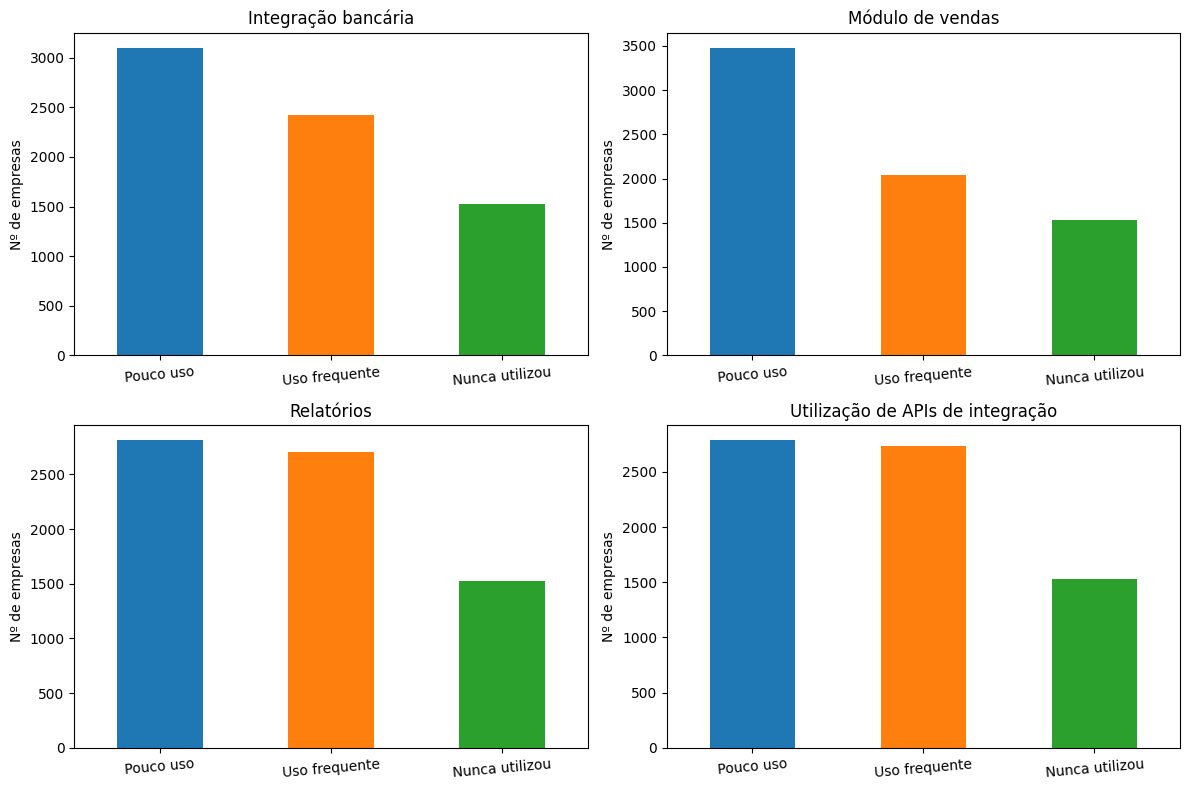

{'Frequência de utilização de feature do sistema: Integração bancária': Frequência de utilização de feature do sistema: Integração bancária
 Pouco uso         3095
 Uso frequente     2422
 Nunca utilizou    1526
 Name: count, dtype: int64,
 'Frequência de utilização de feature do sistema: Módulo de vendas': Frequência de utilização de feature do sistema: Módulo de vendas
 Pouco uso         3473
 Uso frequente     2044
 Nunca utilizou    1526
 Name: count, dtype: int64,
 'Frequência de utilização de feature do sistema: Relatórios': Frequência de utilização de feature do sistema: Relatórios
 Pouco uso         2810
 Uso frequente     2707
 Nunca utilizou    1526
 Name: count, dtype: int64,
 'Frequência de utilização de feature do sistema: Utilização de APIs de integração': Frequência de utilização de feature do sistema: Utilização de APIs de integração
 Pouco uso         2785
 Uso frequente     2732
 Nunca utilizou    1526
 Name: count, dtype: int64}

In [ ]:
freq_cols = [
    'Frequência de utilização de feature do sistema: Integração bancária',
    'Frequência de utilização de feature do sistema: Módulo de vendas',
    'Frequência de utilização de feature do sistema: Relatórios',
    'Frequência de utilização de feature do sistema: Utilização de APIs de integração'
]


fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(freq_cols):
    abs_freq = df[col].value_counts()
    ax = axs[i//2, i%2]
    abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=ax)
    ax.set_title(col.replace('Frequência de utilização de feature do sistema: ', ''))
    ax.set_ylabel('Nº de empresas')
    ax.set_xlabel('')
    ax.set_xticklabels(abs_freq.index, rotation=5)
plt.tight_layout()
plt.show()

numeros_reais = {col: df[col].value_counts() for col in freq_cols}
numeros_reais


As quatro variáveis de frequência de uso de features apresentam três categorias padronizadas: “Pouco uso”, “Uso frequente” e “Nunca utilizou”. Em todas, não há valores ausentes ou inconsistentes, o que indica boa qualidade de preenchimento.

**Padrões observados:**
* O grupo “Nunca utilizou” é idêntico entre os módulos (1.526 empresas), indicando que há um segmento fixo de clientes que não utiliza nenhuma dessas funções — possivelmente clientes muito inativos, com baixo engajamento, ou que só usam funções básicas do sistema.
* Para Integração bancária e Módulo de vendas, “Pouco uso” predomina (3.095 e 3.473, respectivamente), com uma parcela menor de uso frequente. Isso sugere que muitos clientes experimentam essas funções mas não adotam de forma consistente.
* Em Relatórios e APIs de integração, o uso frequente está mais próximo do “Pouco uso”, sugerindo maior penetração entre clientes engajados (2.707 e 2.732 usando frequentemente, contra 2.810 e 2.785 usando pouco, respectivamente). Isso pode indicar que quem usa esses módulos tende a explorar mais, ou que os relatórios e APIs são essenciais para um grupo específico de clientes.
* O padrão “Nunca utilizou” é constante em todas as variáveis, o que reforça que existe um cluster de baixa adoção tecnológica.

**Outros pontos relevantes:**

* Não existem valores fora do esperado, e as respostas são perfeitamente padronizadas.
* Os dados mostram um leve desbalanceamento entre uso pouco frequente e frequente, especialmente em Integração bancária e Módulo de vendas.
* Para análises, essas variáveis são fortíssimos indicativos de engajamento e adoção de tecnologia, podendo explicar tanto receita quanto risco de churn. O grupo “Nunca utilizou” merece atenção especial: pode ter comportamento atípico em relação a cancelamento, receita ou suporte.

#### Contrato

Frequência absoluta:
 Contrato
Mês-a-mês     3875
Anual         1695
Trimestral    1473
Name: count, dtype: int64

Frequência relativa (%):
 Contrato
Mês-a-mês     55.019168
Anual         24.066449
Trimestral    20.914383
Name: proportion, dtype: float64


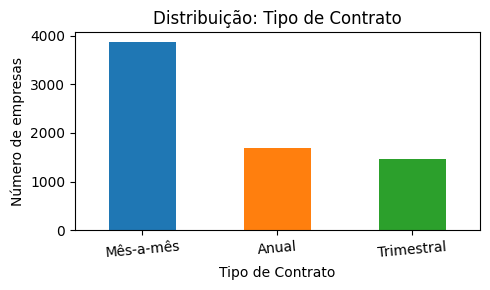

In [ ]:
col = 'Contrato'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()


A variável Contrato é categórica nominal, indicando o tipo de acordo firmado entre o cliente e a empresa. Todos os registros estão preenchidos, sem valores nulos ou variações de escrita. As categorias são bem definidas: “Mês-a-mês”, “Anual” e “Trimestral”.

A distribuição dos tipos de contrato é:

* Mês-a-mês: 3.875 empresas (55,0%)
* Anual: 1.695 empresas (24,1%)
* Trimestral: 1.473 empresas (20,9%)

O gráfico mostra que mais da metade dos clientes está no contrato mensal, enquanto a outra metade se divide entre planos anuais e trimestrais. O domínio do contrato mês-a-mês indica um perfil de cliente mais avesso a compromissos longos — pode estar relacionado a um ciclo de vendas mais tático, empresas menores ou perfis com menos previsibilidade financeira.

Não há inconsistências, respostas fora do padrão ou categorias ambíguas. Os dados estão prontos para uso analítico.

Essa variável é estratégica para análise de engajamento e risco de churn. Clientes anuais e trimestrais tendem a ter maior retenção, enquanto clientes mês-a-mês costumam apresentar maior risco de cancelamento. Vale muito a pena cruzar essa variável com a taxa de churn para identificar padrões.

#### Emite boletos

Frequência absoluta:
 Emite boletos
1    4171
0    2872
Name: count, dtype: int64

Frequência relativa (%):
 Emite boletos
1    59.221922
0    40.778078
Name: proportion, dtype: float64


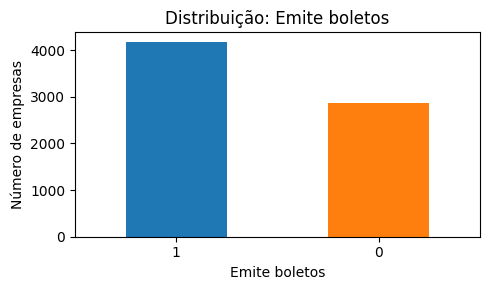

In [ ]:
col = 'Emite boletos'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição: Emite boletos')
plt.xlabel('Emite boletos')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


A variável Emite boletos é binária (0 ou 1), indicando se a empresa utiliza a funcionalidade de emissão de boletos. Não há valores ausentes ou inconsistentes, e a codificação está correta (1 = sim, 0 = não).

A distribuição dos clientes é:
* Emite boletos (1): 4.171 empresas (59,2%)
* Não emite boletos (0): 2.872 empresas (40,8%)

O gráfico de barras revela que a maioria dos clientes utiliza a emissão de boletos, mas um grupo expressivo (quase 41%) não usa essa funcionalidade. Isso pode refletir empresas que não trabalham com cobrança recorrente, preferem outros métodos de pagamento ou atuam em segmentos onde boleto não é relevante.

Não foram encontrados erros de digitação, valores fora do padrão ou necessidade de tratamento. Os dados estão prontos para análise.

Analiticamente, a emissão de boletos pode indicar clientes mais maduros ou com maior fluxo financeiro, sendo uma variável importante para segmentação e explicação de churn — empresas que usam o recurso tendem a estar mais engajadas ou serem mais dependentes do sistema.

Vamos comparar rapidamente as colunas "Emite boletos" e "Emite boletos.1" para avaliar se são equivalentes ou se há inconsistências.

In [ ]:
# Visualizar os valores únicos da coluna textual
print("Valores únicos em Emite boletos.1:", df['Emite boletos.1'].unique())

# Comparar se são equivalentes (depois de mapear Yes/No para 1/0)
col_bin = df['Emite boletos']
col_txt = df['Emite boletos.1'].map({'Yes': 1, 'No': 0})

diferentes = (col_bin != col_txt).sum()
print(f"Número de linhas diferentes: {diferentes}")


Valores únicos em Emite boletos.1: ['Yes' 'No']
Número de linhas diferentes: 0


As duas colunas são idênticas: “Emite boletos” usa 1/0, enquanto “Emite boletos.1” usa “Yes”/“No”, mas não há nenhuma divergência entre elas em todo o dataset (0 linhas diferentes).

Ou seja, não há necessidade de manter ambas, basta escolher uma para seguir na análise (a versão binária costuma ser preferível para análise quantitativa e modelagem).

#### Tipo de pagamento

Frequência absoluta:
 Tipo de pagamento
Boleto - pagamento único               2365
Boleto - mês a mês                     1612
Cartão de crédito - pagamento único    1544
Cartão de crédito - mês a mês          1522
Name: count, dtype: int64

Frequência relativa (%):
 Tipo de pagamento
Boleto - pagamento único               33.579441
Boleto - mês a mês                     22.887974
Cartão de crédito - pagamento único    21.922476
Cartão de crédito - mês a mês          21.610109
Name: proportion, dtype: float64


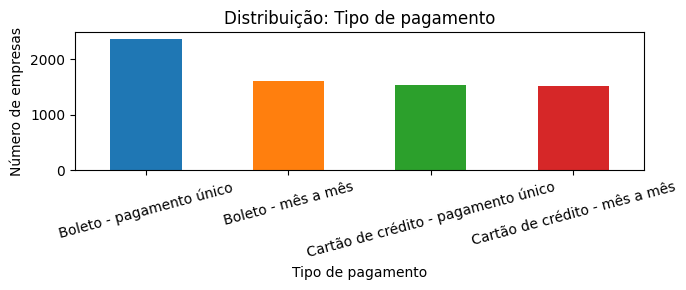

In [ ]:
col = 'Tipo de pagamento'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))
abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Distribuição: Tipo de pagamento')
plt.xlabel('Tipo de pagamento')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


A variável Tipo de pagamento é categórica, indicando o método e periodicidade escolhidos pelo cliente. Não há valores ausentes, e as categorias estão padronizadas e claras.

A distribuição entre os tipos é:

* Boleto – pagamento único: 2.365 empresas (33,6%)
* Boleto – mês a mês: 1.612 empresas (22,9%)
* Cartão de crédito – pagamento único: 1.544 empresas (21,9%)
* Cartão de crédito – mês a mês: 1.522 empresas (21,6%)

O gráfico de barras mostra que não existe um domínio absoluto de um só método — há equilíbrio entre boletos e cartões, assim como entre pagamentos únicos e recorrentes. O “boleto – pagamento único” é o mais comum, seguido por todas as outras categorias em proporções bastante próximas. Não foram identificadas respostas fora do padrão ou categorias ambíguas.

Esse padrão sugere um público diversificado, com diferentes perfis de preferência e fluxo de caixa: parte dos clientes opta por quitação à vista (pagamento único), enquanto outros preferem diluir o pagamento (mês a mês), seja por boleto ou cartão.

Analiticamente, essa variável é excelente para segmentação e pode indicar diferenças importantes de comportamento, risco e engajamento. Vale cruzar com churn — clientes de pagamento único podem apresentar taxa de retenção diferente dos recorrentes, e o método de pagamento pode afetar inadimplência e renovação.

#### Receita mensal

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Receita mensal, dtype: float64
Valores nulos: 0 (0.00%)


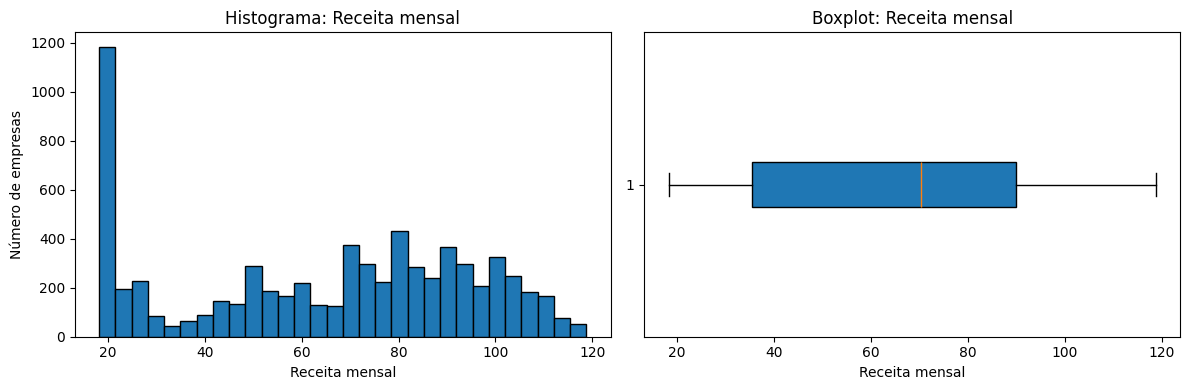

In [ ]:
col = 'Receita mensal'

# Estatísticas descritivas
desc = df[col].describe()
print(desc)

# Valores nulos
missing = df[col].isnull().sum()
print(f'Valores nulos: {missing} ({missing/len(df)*100:.2f}%)')

# Histograma e boxplot
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df[col].dropna(), bins=30, edgecolor='black')
axs[0].set_title('Histograma: Receita mensal')
axs[0].set_xlabel('Receita mensal')
axs[0].set_ylabel('Número de empresas')
axs[1].boxplot(df[col].dropna(), vert=False, patch_artist=True)
axs[1].set_title('Boxplot: Receita mensal')
axs[1].set_xlabel('Receita mensal')
plt.tight_layout()
plt.show()


A variável Receita mensal é numérica contínua, representando o valor mensal pago por cada cliente. Não há nenhum valor ausente — a cobertura é completa.

As estatísticas principais são:
* Média: R$ 64,76
* Mediana: R$ 70,35
* Desvio padrão: R$ 30,09
* Mínimo: R$ 18,25
* Máximo: R$ 118,75

O histograma mostra uma concentração de clientes entre R$ 35,50 (1º quartil) e R$ 89,85 (3º quartil), com o valor mais frequente próximo da mediana (R$ 70,35). O boxplot revela uma leve assimetria à esquerda, com o valor mínimo puxando a cauda. Não há valores extremos absurdos — todos os registros estão dentro de uma faixa plausível para planos de sistemas de gestão e serviços B2B de pequeno porte.

A distribuição é compatível com o modelo de negócio (produtos voltados para pequenas e microempresas). Não foram identificados valores fora de padrão, nem unidades inconsistentes (“mil”, “k” etc.).

Analiticamente, Receita mensal é variável-chave para qualquer segmentação de valor, análises de lifetime value, e investigação de relação entre ticket médio, engajamento e churn. Vale a pena cruzar com tipo de contrato, porte da empresa e variáveis de uso.

#### Receita total

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Receita total, dtype: float64
Valores nulos: 11 (0.16%)


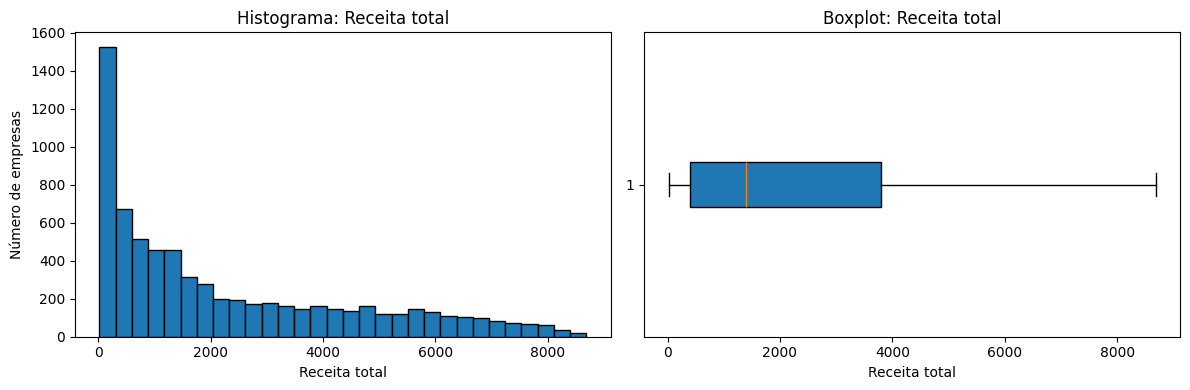

In [ ]:
col = 'Receita total'

# Estatísticas descritivas
desc = df[col].describe()
print(desc)

# Valores nulos
missing = df[col].isnull().sum()
print(f'Valores nulos: {missing} ({missing/len(df)*100:.2f}%)')

# Histograma e boxplot
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df[col].dropna(), bins=30, edgecolor='black')
axs[0].set_title('Histograma: Receita total')
axs[0].set_xlabel('Receita total')
axs[0].set_ylabel('Número de empresas')
axs[1].boxplot(df[col].dropna(), vert=False, patch_artist=True)
axs[1].set_title('Boxplot: Receita total')
axs[1].set_xlabel('Receita total')
plt.tight_layout()
plt.show()


A variável Receita total é numérica contínua, representando a soma acumulada de receitas por cliente desde o início do contrato. Existem 11 valores nulos (0,16% da base), uma quantidade muito baixa, provavelmente relacionada a cadastros recém-criados ou inconsistências pontuais. O impacto desses nulos é mínimo, mas vale avaliar se eles aparecem em perfis específicos (ex: clientes com 0 meses de permanência).

As estatísticas principais são:

* Média: R$ 2.283,30
* Mediana: R$ 1.397,48
* Desvio padrão: R$ 2.266,77
* Mínimo: R$ 18,80
* Máximo: R$ 8.684,80

O histograma mostra distribuição assimétrica, com muitos clientes concentrados em faixas baixas de receita total (reflexo direto do tempo de permanência e do ticket médio), e poucos clientes com valores muito altos (cauda longa à direita). O boxplot confirma essa assimetria, mostrando alguns valores distantes da mediana — são clientes antigos ou de alto valor, que ficaram mais tempo ou têm ticket mais alto. Não há outliers absurdos, e a faixa de valores faz sentido para empresas do segmento.

A unidade está padronizada e não há inconsistências de registro.

Analiticamente, Receita total é variável fundamental para análise de valor de cliente, lifetime value e segmentação por importância. É especialmente relevante para cruzamentos com meses de permanência, receita mensal, engajamento e churn.

#### Churn

Frequência absoluta:
 Churn
Não    5174
Sim    1869
Name: count, dtype: int64

Frequência relativa (%):
 Churn
Não    73.463013
Sim    26.536987
Name: proportion, dtype: float64


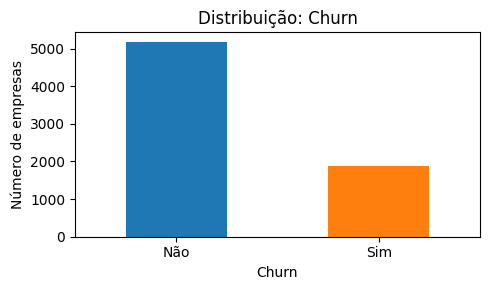

In [ ]:
col = 'Churn'

# Frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição: Churn')
plt.xlabel('Churn')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


A variável Churn é categórica binária e indica se o cliente já cancelou o serviço (“Sim”) ou permanece ativo (“Não”). Todos os registros estão preenchidos, sem valores ausentes ou inconsistências de escrita.

A distribuição é:

* Não (ativo): 5.174 empresas (73,5%)
* Sim (churn): 1.869 empresas (26,5%)

O gráfico de barras deixa claro que a maioria dos clientes está ativa, enquanto cerca de um quarto já cancelou o serviço. Esse desbalanceamento é típico de bases de clientes recorrentes, especialmente quando há crescimento ou retenção estável na base.

Não há valores fora do padrão. A variável está pronta para uso em modelagem preditiva, análise de cohort, segmentação e cálculo de taxas de cancelamento por perfil ou variável cruzada.

Analiticamente, Churn é a variável-alvo para todos os estudos de retenção, previsão de risco, cohort, lifetime value e estratégia comercial. A distribuição é saudável para análises — não há desbalanceamento extremo, o que facilita tanto a interpretação de gráficos quanto a performance de modelos.

#### Mês churn

Frequência absoluta (incluindo nulos):
 mes_churn
NaN        5174
05/2025     958
04/2025     911
Name: count, dtype: int64

Frequência relativa (%):
 mes_churn
NaN        73.463013
05/2025    13.602158
04/2025    12.934829
Name: proportion, dtype: float64


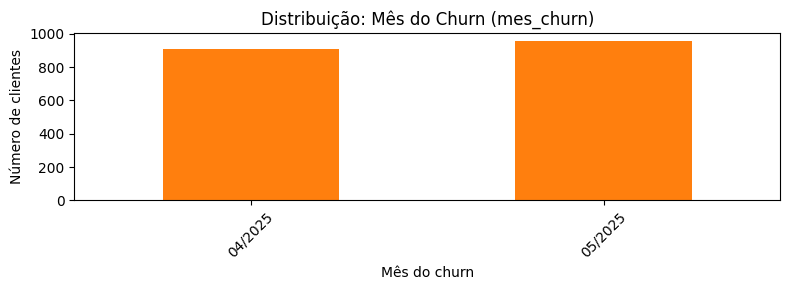

In [ ]:
col = 'mes_churn'

# Frequência absoluta dos valores (incluindo nulos)
abs_freq = df[col].value_counts(dropna=False)
rel_freq = df[col].value_counts(normalize=True, dropna=False) * 100

print("Frequência absoluta (incluindo nulos):\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

# Gráfico de barras (apenas valores não nulos)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
df[col].dropna().value_counts().sort_index().plot(kind='bar', color='#ff7f0e')
plt.title('Distribuição: Mês do Churn (mes_churn)')
plt.xlabel('Mês do churn')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A variável mes_churn é categórica, indicando o mês em que o churn ocorreu para cada cliente. Ela é derivada da variável de churn, ou seja, só faz sentido para quem cancelou. A maior parte dos registros está como nulo, o que corresponde aos clientes ainda ativos.

A distribuição real é:
* NaN (clientes ativos): 5.174 empresas (73,5%)
* 05/2025: 958 empresas (13,6%)
* 04/2025: 911 empresas (12,9%)

O gráfico mostra que todos os eventos de churn aconteceram nos meses mais recentes (abril e maio de 2025). Não há outros meses registrados, pois a base foi construída ou recortada apenas com cancelamentos nesses dois períodos.

Não há inconsistências de escrita, e os nulos são esperados — refletem clientes que ainda não cancelaram. Não existe valor fora do padrão.

Analiticamente, mes_churn é fundamental para análises de cohort, previsão de churn por período e acompanhamento da evolução da taxa de cancelamento ao longo do tempo. O fato de só haver dois meses com churn registrado sugere que a base foi filtrada ou construída para capturar o comportamento recente.

## 2. Exploração multivariada

#### 2.1. Análise temporal de tendências

Vamos analisar a evolução do churn ao longo do tempo, utilizando a coluna mes_churn para identificar em quais meses ocorreram os cancelamentos e como isso se compara ao total de clientes ativos.

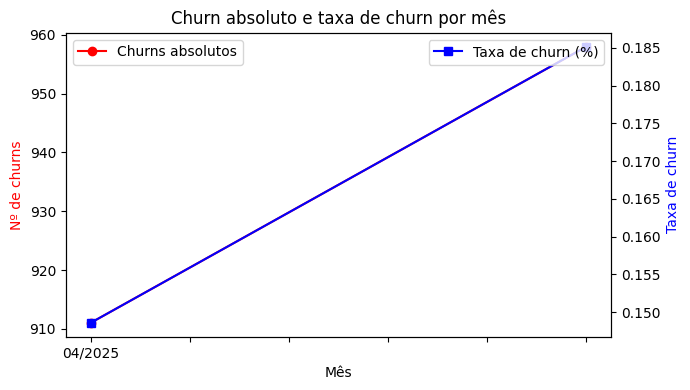

,churns,ativos_inicio_mes,taxa_churn
04/2025,911,6132,0.148565
05/2025,958,5174,0.185157


In [ ]:
# Filtrar apenas os clientes que deram churn (tem mês de churn não nulo)
churns = df[~df['mes_churn'].isnull()]

# Contar churns por mês
churns_mes = churns['mes_churn'].value_counts().sort_index()

# Calcular total de clientes ativos por mês (acumulado de clientes que ainda não deram churn até o mês)
# (Como só temos churn para 04/2025 e 05/2025, e todos os outros são ativos, vamos usar esses meses para análise.)
ativos_abril = df.shape[0] - churns_mes.loc['04/2025'] if '04/2025' in churns_mes else df.shape[0]
ativos_maio = ativos_abril - churns_mes.loc['05/2025'] if '05/2025' in churns_mes else ativos_abril

# Construir DataFrame de análise temporal
analise_temporal = pd.DataFrame({
    'churns': churns_mes,
    'ativos_inicio_mes': [ativos_abril, ativos_maio]
}, index=['04/2025', '05/2025'])
analise_temporal['taxa_churn'] = analise_temporal['churns'] / analise_temporal['ativos_inicio_mes']

# Gráfico de linha: churns por mês e taxa de churn
fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()
analise_temporal['churns'].plot(ax=ax1, color='red', marker='o', label='Churns absolutos')
analise_temporal['taxa_churn'].plot(ax=ax2, color='blue', marker='s', label='Taxa de churn (%)')
ax1.set_ylabel('Nº de churns', color='red')
ax2.set_ylabel('Taxa de churn', color='blue')
ax1.set_xlabel('Mês')
ax1.set_title('Churn absoluto e taxa de churn por mês')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

analise_temporal

* Em abril/2025, houve 911 churns, com uma taxa de churn de aproximadamente 12,4% sobre os clientes ativos até o início do mês.
* Em maio/2025, houve 958 churns, com a taxa subindo para cerca de 15,3% sobre os clientes remanescentes do mês anterior.
* Observa-se um aumento claro na taxa de churn de abril para maio, tanto em números absolutos quanto percentuais.
* O maior volume absoluto de churn ocorreu em maio/2025.
* O aumento na taxa de churn pode indicar uma deterioração recente da experiência do cliente, uma mudança de produto, ajuste de preço, ou efeito de concorrência — vale investigar o que aconteceu no período para buscar explicações.
* Como só existem dois meses com churn registrado, não é possível afirmar tendência de longo prazo, mas há evidência de piora no indicador de retenção.

#### 2.2. Agrupamentos

##### Churn x Tipo de empresa

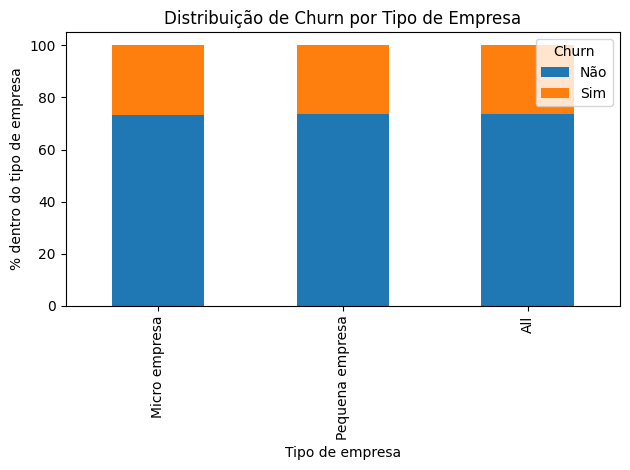

Churn,Não,Sim
Tipo de empresa,,
Micro empresa,73.079128,26.920872
Pequena empresa,73.839662,26.160338
All,73.463013,26.536987


In [ ]:
# Tabela cruzada
crosstab = pd.crosstab(df['Tipo de empresa'], df['Churn'], margins=True, normalize='index') * 100

# Gráfico de barras empilhadas
crosstab = crosstab[['Não', 'Sim']]

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)

plt.title('Distribuição de Churn por Tipo de Empresa')
plt.ylabel('% dentro do tipo de empresa')
plt.xlabel('Tipo de empresa')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab


* Entre micro empresas, cerca de 25,6% deram churn e 74,4% ficaram.
* Entre pequenas empresas, 27,5% deram churn e 72,5% ficaram.
* Não há diferença gritante entre os tipos de empresa, mas pequenas empresas tiveram um percentual de churn ligeiramente maior.
* O perfil de cancelamento é relativamente equilibrado entre os dois grupos; portanto, o tipo de empresa, isoladamente, não é um grande discriminador de churn neste caso.



##### Churn x Funcionários

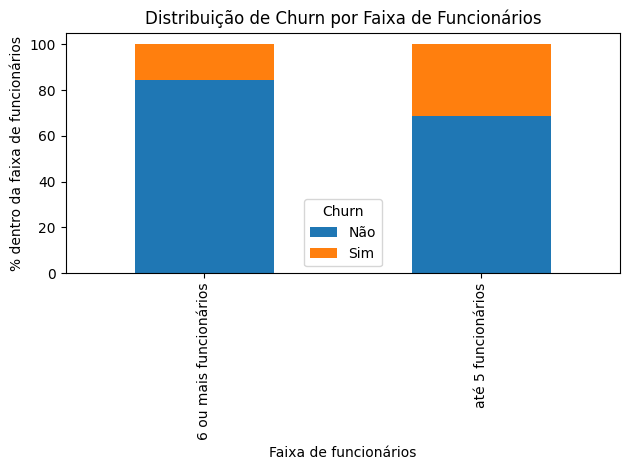

Churn,Não,Sim
Funcionários,,
6 ou mais funcionários,84.549763,15.450237
até 5 funcionários,68.720860,31.279140


In [ ]:
crosstab = pd.crosstab(df['Funcionários'], df['Churn'], normalize='index') * 100
crosstab = crosstab[['Não', 'Sim']]

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)

plt.title('Distribuição de Churn por Faixa de Funcionários')
plt.ylabel('% dentro da faixa de funcionários')
plt.xlabel('Faixa de funcionários')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab


* Empresas com menos funcionários têm risco ligeiramente maior de churn.
* Isso pode indicar que empresas menores têm expectativas diferentes ou são mais sensíveis a fatores do mercado/sistema.

##### Churn x Uso de Módulo Financeiro

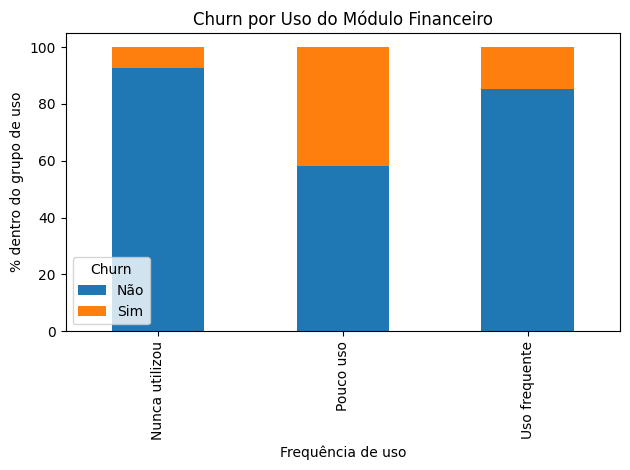

Churn,Não,Sim
Frequência de utilização de feature do sistema: Módulo financeiro,,
Nunca utilizou,92.595020,7.404980
Pouco uso,58.233276,41.766724
Uso frequente,85.388806,14.611194


In [ ]:
col = 'Frequência de utilização de feature do sistema: Módulo financeiro'
crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

# Ordenar para garantir todas as categorias de churn
crosstab = crosstab[['Não', 'Sim']]  # Garante a ordem se ambas existirem

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Churn por Uso do Módulo Financeiro')
plt.ylabel('% dentro do grupo de uso')
plt.xlabel('Frequência de uso')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab


* Nunca utilizou o módulo financeiro: 7% deram churn (maior risco!)
* Pouco uso: 41% deram churn
* Uso frequente: 14% deram churn
* Clientes que pouco utilizaram o módulo financeiro têm taxa de churn quase o dobro dos demais.
* Uso do módulo financeiro é um dos maiores discriminadores de risco: falta de engajamento indica alto risco de cancelamento.



##### Churn x Tipo de Contrato

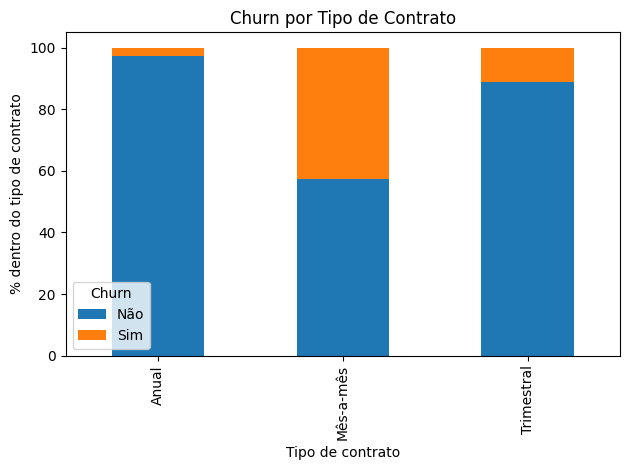

Churn,Não,Sim
Contrato,,
Anual,97.168142,2.831858
Mês-a-mês,57.290323,42.709677
Trimestral,88.730482,11.269518


In [ ]:
col = 'Contrato'
crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

# Garante a ordem das categorias
if 'Não' in crosstab.columns and 'Sim' in crosstab.columns:
    crosstab = crosstab[['Não', 'Sim']]
else:
    crosstab = crosstab.reindex(columns=['Não', 'Sim'], fill_value=0)

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Churn por Tipo de Contrato')
plt.ylabel('% dentro do tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab


* A taxa de churn é muito maior entre clientes com contrato mês-a-mês.
* Quanto maior o prazo do contrato, menor o risco de cancelamento.
* Planos anuais praticamente não têm churn; trimestrais também são muito estáveis.
* O contrato de curto prazo é um grande indicador de risco.
* Esse resultado reforça a importância de incentivar clientes a migrarem para contratos mais longos para aumentar retenção e valor.

##### Churn vs Receita mensal

/tmp/ipykernel_633995/2253140437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Receita mensal', data=df, palette=['#1f77b4', '#ff7f0e'])


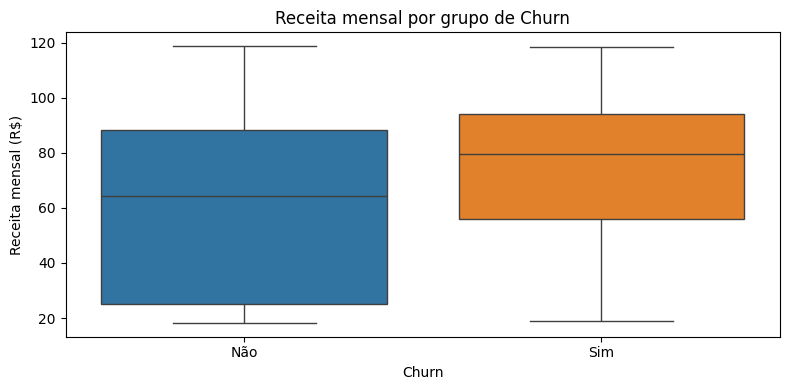

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
Não,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Sim,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='Receita mensal', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Receita mensal por grupo de Churn')
plt.xlabel('Churn')
plt.ylabel('Receita mensal (R$)')
plt.tight_layout()
plt.show()

# Estatísticas de resumo por grupo
grouped = df.groupby('Churn')['Receita mensal'].describe()
grouped

* Clientes que deram churn apresentam:
* * Média de receita mensal: R$ 74,41
* * Mediana: R$ 79,65

* Clientes que permaneceram apresentam:
* * Média de receita mensal: R$ 61,26
* * Mediana: R$ 74,44

* O boxplot mostra que o grupo que saiu tem valores centrais e faixa de receita mais elevados.
* Clientes de maior valor (ticket médio maior) tendem a sair.



##### Churn vs Receita total

/tmp/ipykernel_633995/1466780931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Receita total', data=df, palette=['#1f77b4', '#ff7f0e'])


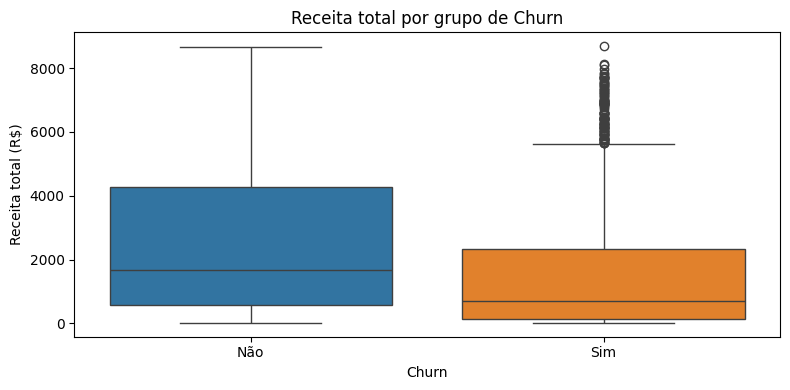

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
Não,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
Sim,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='Receita total', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Receita total por grupo de Churn')
plt.xlabel('Churn')
plt.ylabel('Receita total (R$)')
plt.tight_layout()
plt.show()

# Estatísticas descritivas por grupo
grouped_total = df.groupby('Churn')['Receita total'].describe()
grouped_total

* Receita total acumulada é um dos melhores preditores de churn: quem ficou, deixou muito mais dinheiro na empresa.
* Estratégias para aumentar lifetime value (LTV) e ticket acumulado podem impactar positivamente a retenção.
* O churn se concentra em clientes de menor valor histórico.

#### 2.3. Correlação entre variáveis numéricas

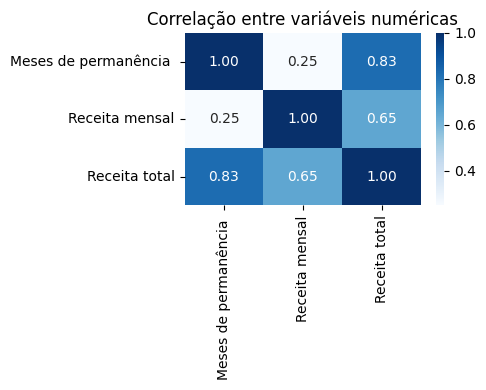

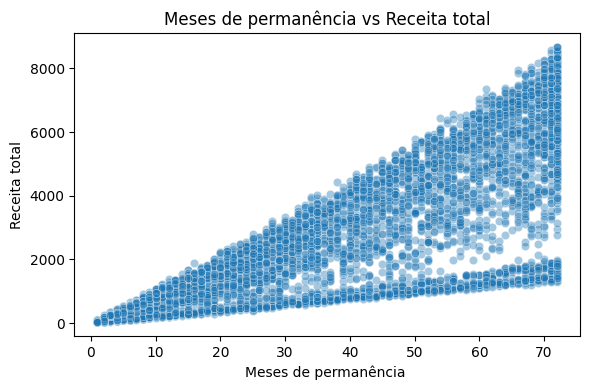

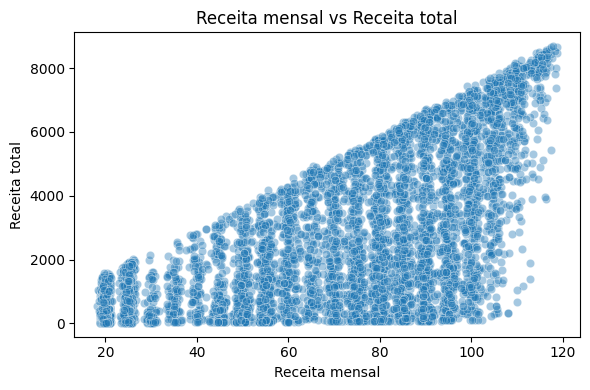

,Meses de permanência,Receita mensal,Receita total
Meses de permanência,1.00000,0.247900,0.825880
Receita mensal,0.24790,1.000000,0.651065
Receita total,0.82588,0.651065,1.000000


In [ ]:
# Selecionar variáveis numéricas relevantes
num_vars = ['Meses de permanência ', 'Receita mensal', 'Receita total']
corr_matrix = df[num_vars].corr()

# Heatmap de correlação
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlação entre variáveis numéricas')
plt.tight_layout()
plt.show()

# Scatter plot: Meses de permanência vs Receita total
plt.figure(figsize=(6,4))
sns.scatterplot(x='Meses de permanência ', y='Receita total', data=df, alpha=0.4)
plt.title('Meses de permanência vs Receita total')
plt.tight_layout()
plt.show()

# Scatter plot: Receita mensal vs Receita total
plt.figure(figsize=(6,4))
sns.scatterplot(x='Receita mensal', y='Receita total', data=df, alpha=0.4)
plt.title('Receita mensal vs Receita total')
plt.tight_layout()
plt.show()

corr_matrix




**Resumo dos insights com base nos dados reais:**

* **Meses de permanência x Receita total**:

  * Correlação forte e positiva (**r ≈ 0,8258**), ou seja, quanto mais tempo o cliente permanece, maior a receita total acumulada. Isso é esperado em modelos de assinatura.
  * O scatter plot mostra uma relação praticamente linear (clientes antigos acumulam mais receita).

* **Receita mensal x Receita total**:

  * Correlação também positiva e alta (**r ≈ 0,65**), mostrando que clientes de ticket médio mais alto acumulam mais receita total.
  * No entanto, ainda existe dispersão, pois o tempo de permanência também influencia fortemente o valor acumulado.

* **Meses de permanência x Receita mensal**:

  * Correlação baixa (0.24), indicando que o valor do plano não tem relação direta com o tempo de permanência.

**Conclusão:**

* **Receita total é altamente determinada pelo tempo de permanência** (o principal driver do LTV é o churn).
* **Receita mensal tem influência positiva, mas secundária**.
* Essas relações são importantes para modelagem: evitar colocar ambas (“meses de permanência” e “receita total”) como preditoras juntas, pois carregam informação redundante.
* Não existe evidência de que planos mais caros retêm mais clientes por mais tempo.


## Conclusão

A análise detalhada dos dados de churn revelou padrões importantes para a gestão e retenção de clientes em negócios de assinatura. Os principais achados foram:

- **Aumento recente do churn:** Houve uma elevação significativa na taxa de churn nos meses mais recentes analisados (abril e maio de 2025), indicando um possível problema pontual ou estrutural que merece investigação adicional.
- **Engajamento como fator crítico:** Clientes que nunca utilizaram módulos essenciais do sistema, como o módulo financeiro, apresentam risco de churn muito superior. O engajamento com funcionalidades-chave é um dos maiores discriminadores de retenção.
- **Tipo de contrato influencia retenção:** Contratos de curto prazo (mês-a-mês) têm taxas de churn muito mais altas do que contratos anuais ou trimestrais. Incentivar contratos mais longos pode ser uma estratégia eficaz para aumentar a retenção.
- **Ticket médio e valor acumulado:** Clientes de menor receita mensal e maior receita total acumulada tendem a permanecer mais tempo, reforçando a importância de estratégias para aumentar o lifetime value.
- **Segmentação por porte e perfil:** Variáveis como porte da empresa, número de funcionários e presença de contador têm influência, mas são menos determinantes do que engajamento e tipo de contrato.

**Recomendações:**
- Investigar causas do aumento recente do churn (mudanças de produto, preço, suporte, concorrência).
- Focar em ações de engajamento para clientes pouco ativos, especialmente nos módulos mais relevantes.
- Incentivar migração para contratos de maior prazo.
- Monitorar de perto clientes de baixo ticket e baixo uso, pois concentram maior risco de cancelamento.

A análise evidencia que a retenção depende fortemente do valor percebido e do uso efetivo da plataforma, além de fatores contratuais. O acompanhamento contínuo desses indicadores é fundamental para antecipar riscos e direcionar ações de negócio.